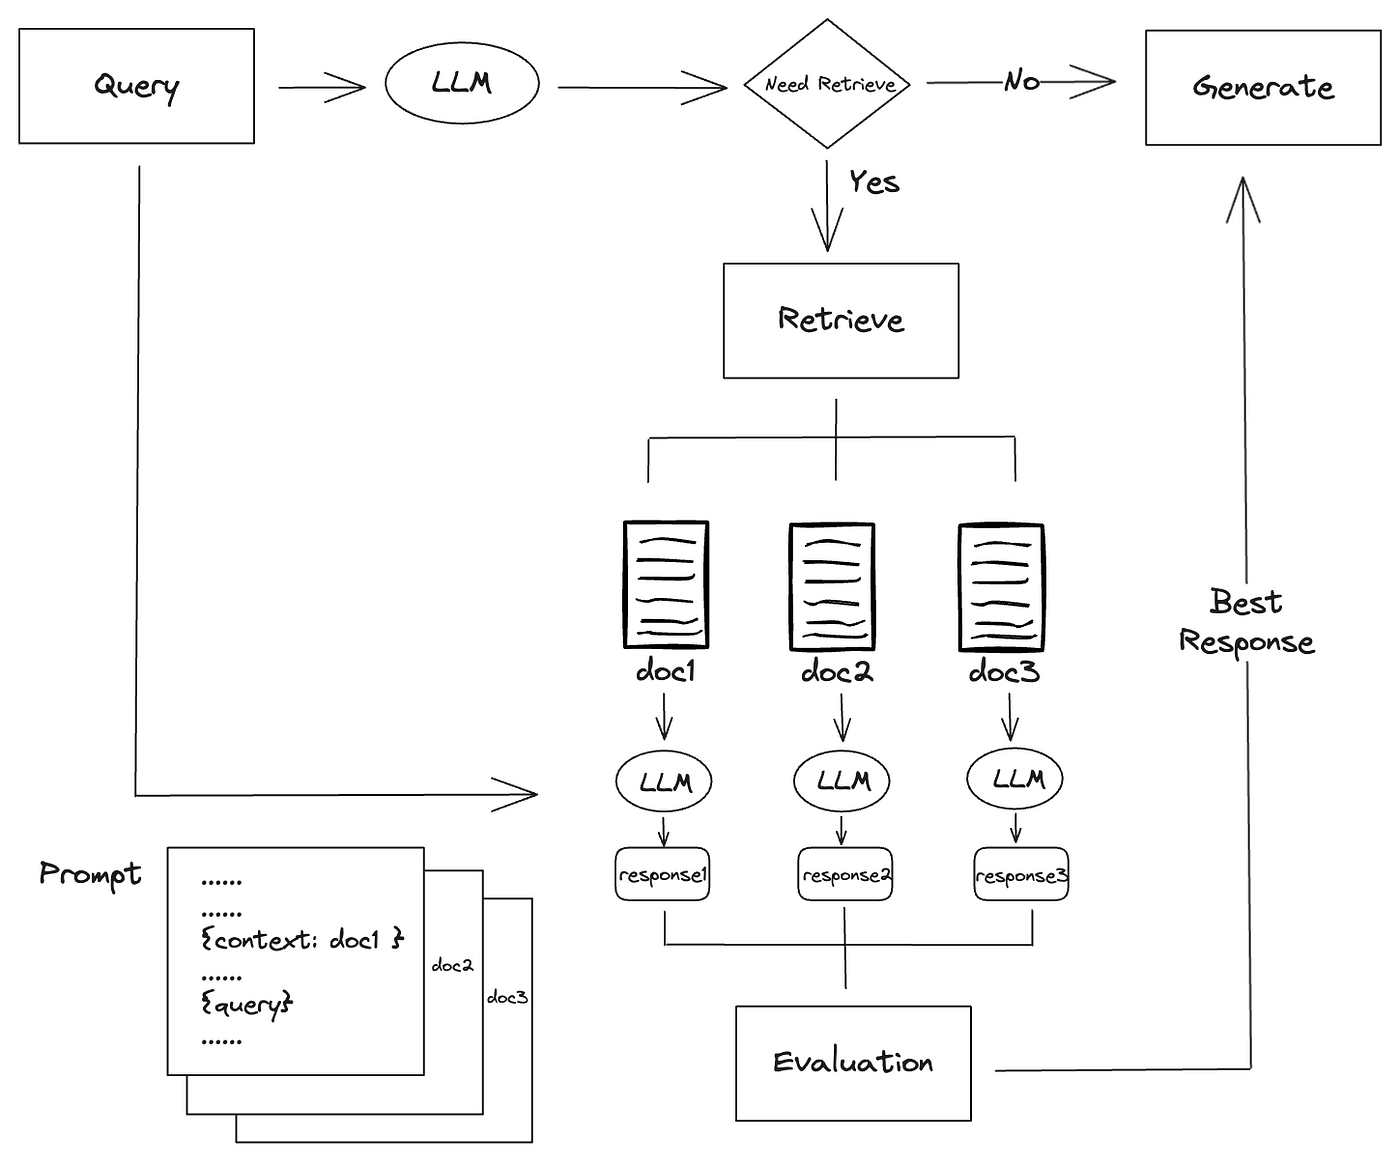

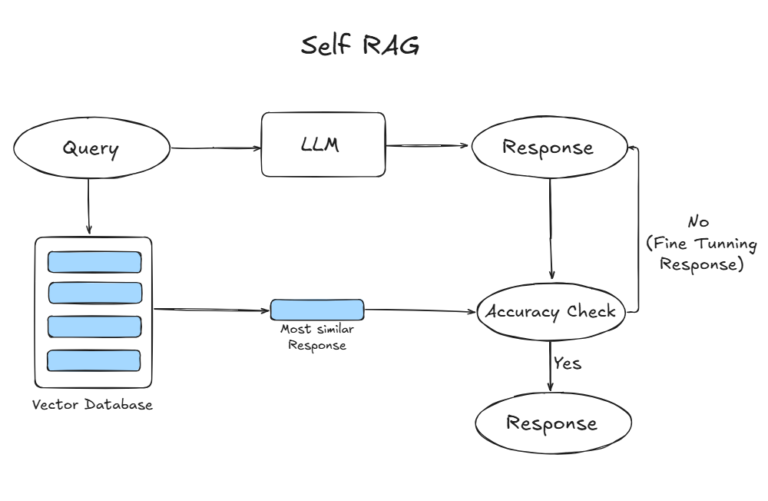

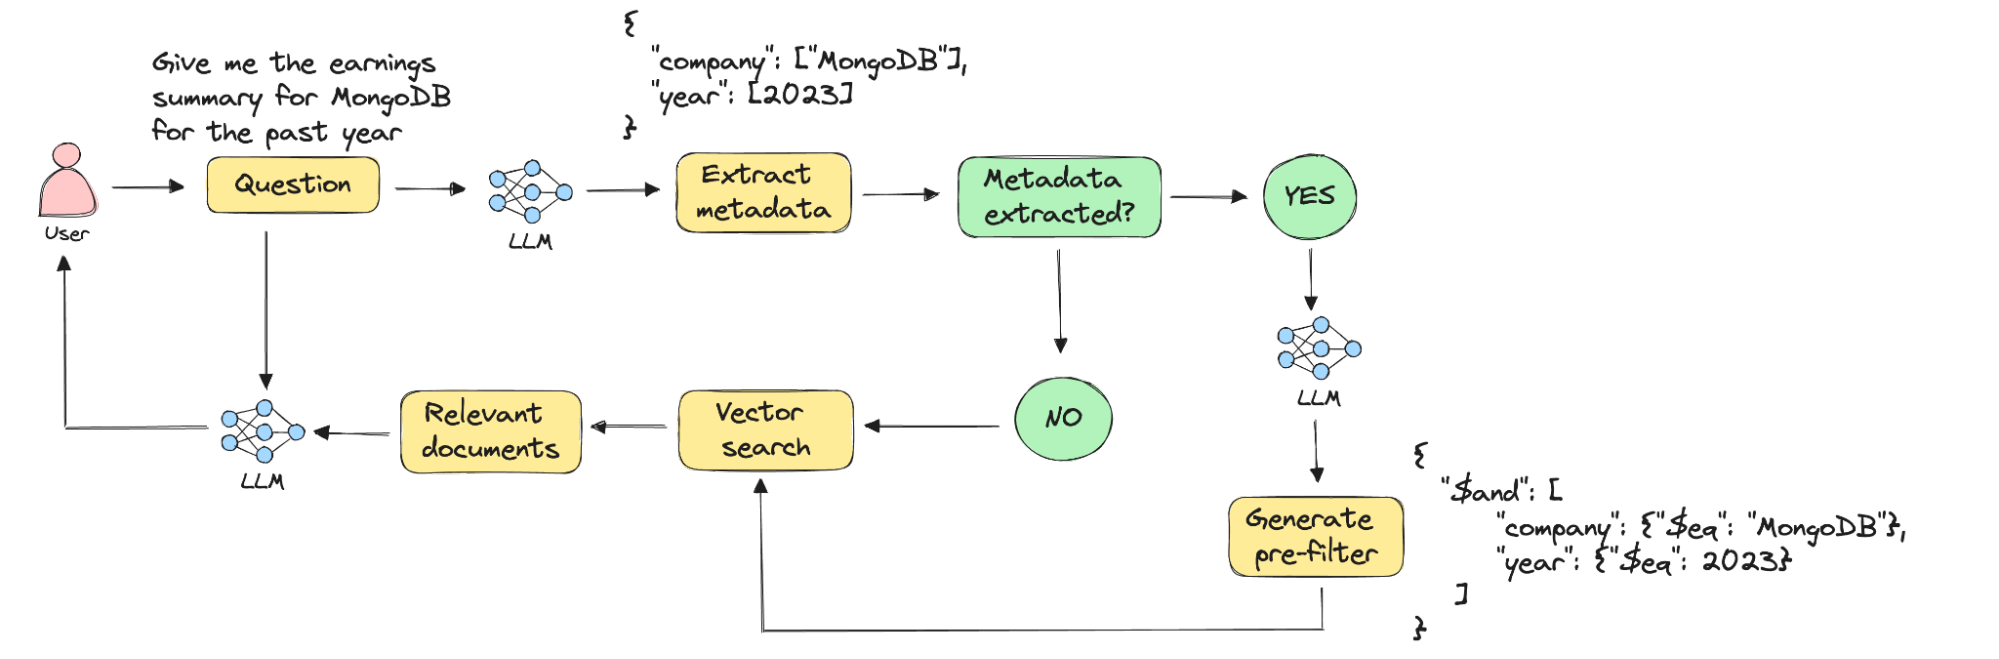

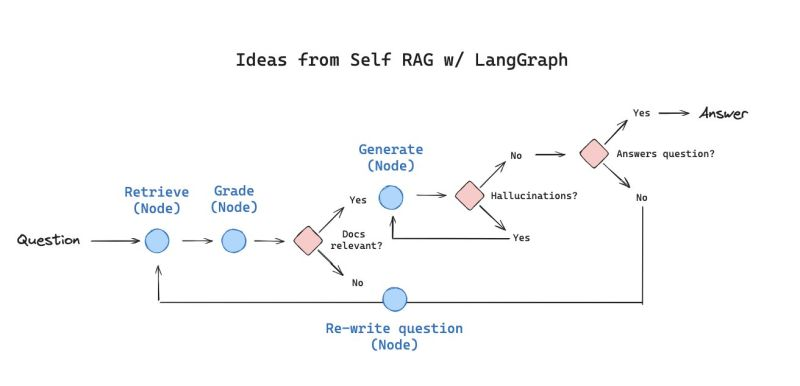

In [1]:
import os
from dotenv import load_dotenv

GOOGLE_API_KEY = os.getenv('GEMINI_API_KEY')
os.environ["GOOGLE_API_KEY"] = GOOGLE_API_KEY

In [2]:
from langchain_google_genai import GoogleGenerativeAIEmbeddings
gemini_embeddings = GoogleGenerativeAIEmbeddings(model="models/embedding-001")

d:\a27_YEARS_OLD\RAG_ranking\venv\Lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [3]:
from langchain_google_genai import ChatGoogleGenerativeAI
llm = ChatGoogleGenerativeAI(model="gemini-1.5-pro")

In [5]:
result = llm.invoke("Write a ballad about LangChain")
print(result.content)

The coder toiled, in screen's pale light,
With datasets vast and code so tight,
To build a chain, a link so strong,
That language models could play along.
LangChain he named this wondrous thing,
A tool to make the AI sing.

From OpenAI's vast domain,
To Hugging Face, a different strain,
He wove the links, a careful hand,
To query, prompt, and understand.
No longer trapped in single source,
LangChain unleashed a powerful force.

With agents keen and memories deep,
The models' secrets it could keep,
From chatbots bright to question's art,
LangChain played a crucial part.
It whispered prompts, a guiding light,
And shaped the answers, clear and bright.

But whispers turned to rumbling sound,
As challenges rose from the ground.
The context window, a limiting frame,
And hallucinations, a dangerous game.
The coder fought, with brow in sweat,
To tame the beast, and pay the debt.

He crafted chains, with tools so fine,
To filter noise and truth define.
He built in checks, a watchful eye,
To cat

In [4]:
from langchain_chroma import Chroma

In [5]:
from langchain_core.documents import Document

In [6]:
docs = [
    Document(
        page_content="A bunch of scientists bring back dinosaurs and mayhem breaks loose",
        metadata={"year": 1993, "rating": 7.7, "genre": "science fiction"},
    ),
    Document(
        page_content="Leo DiCaprio gets lost in a dream within a dream within a dream within a ...",
        metadata={"year": 2010, "director": "Christopher Nolan", "rating": 8.2},
    ),
    Document(
        page_content="A psychologist / detective gets lost in a series of dreams within dreams within dreams and Inception reused the idea",
        metadata={"year": 2006, "director": "Satoshi Kon", "rating": 8.6},
    ),
    Document(
        page_content="A bunch of normal-sized women are supremely wholesome and some men pine after them",
        metadata={"year": 2019, "director": "Greta Gerwig", "rating": 8.3},
    ),
    Document(
        page_content="Toys come alive and have a blast doing so",
        metadata={"year": 1995, "genre": "animated"},
    ),
    Document(
        page_content="A hacker discovers reality is a simulation and leads a rebellion against the machines controlling it.",
        metadata={"year": 1999, "director": "Lana Wachowski, Lilly Wachowski", "rating": 8.7, "genre": "science fiction"},
    ),
    Document(
        page_content="A young lion prince flees his kingdom only to learn the true meaning of responsibility and bravery.",
        metadata={"year": 1994, "rating": 8.5, "genre": "animated"},
    ),
    Document(
        page_content="Batman faces off against the Joker, a criminal mastermind who plunges Gotham into chaos.",
        metadata={"year": 2008, "director": "Christopher Nolan", "rating": 9.0, "genre": "action"},
    ),
    Document(
        page_content="A team of explorers travel through a wormhole in space in an attempt to ensure humanity's survival.",
        metadata={"year": 2014, "director": "Christopher Nolan", "rating": 8.6, "genre": "science fiction"},
    )
]

In [7]:
vectorstore = Chroma.from_documents(docs, gemini_embeddings)

In [10]:
question1 = "Which 1994 animated movie has a rating of 8.5?"

In [11]:

question2 = "Which movie features Batman facing off against the Joker and who directed it?"

In [12]:

question3 = "What genre is the movie 'The Matrix' and who directed it?"

In [13]:
vectorstore.similarity_search(question1)

[Document(id='c0afc784-7dc5-4f81-8284-9abbaa879c0b', metadata={'genre': 'animated', 'year': 1995}, page_content='Toys come alive and have a blast doing so'),
 Document(id='b68eb797-3229-4490-8c4d-b6d3c8d8805e', metadata={'genre': 'science fiction', 'rating': 7.7, 'year': 1993}, page_content='A bunch of scientists bring back dinosaurs and mayhem breaks loose'),
 Document(id='d98604bf-7642-4831-bbad-c5557c77b3d5', metadata={'genre': 'animated', 'rating': 8.5, 'year': 1994}, page_content='A young lion prince flees his kingdom only to learn the true meaning of responsibility and bravery.'),
 Document(id='6c215708-9004-4aeb-8166-8017dccd07e7', metadata={'director': 'Christopher Nolan', 'rating': 8.2, 'year': 2010}, page_content='Leo DiCaprio gets lost in a dream within a dream within a dream within a ...')]

In [14]:
vectorstore.similarity_search(question2)

[Document(id='39172230-ec42-4fc9-9958-d7c08a5d98b6', metadata={'director': 'Christopher Nolan', 'genre': 'action', 'rating': 9.0, 'year': 2008}, page_content='Batman faces off against the Joker, a criminal mastermind who plunges Gotham into chaos.'),
 Document(id='b80f7c36-bee6-4075-81ee-cf3ba90ef47a', metadata={'director': 'Satoshi Kon', 'rating': 8.6, 'year': 2006}, page_content='A psychologist / detective gets lost in a series of dreams within dreams within dreams and Inception reused the idea'),
 Document(id='b68eb797-3229-4490-8c4d-b6d3c8d8805e', metadata={'genre': 'science fiction', 'rating': 7.7, 'year': 1993}, page_content='A bunch of scientists bring back dinosaurs and mayhem breaks loose'),
 Document(id='6c215708-9004-4aeb-8166-8017dccd07e7', metadata={'director': 'Christopher Nolan', 'rating': 8.2, 'year': 2010}, page_content='Leo DiCaprio gets lost in a dream within a dream within a dream within a ...')]

In [8]:
retriever = vectorstore.as_retriever(search_type="similarity", search_kwargs={"k": 3})

In [9]:
from operator import itemgetter
from langchain.prompts import ChatPromptTemplate
from langchain.schema.output_parser import StrOutputParser
from langchain.schema.runnable import RunnableLambda, RunnablePassthrough

In [10]:
import textwrap
def wrap_text(text, width=90): #preserve_newlines
    # Split the input text into lines based on newline characters
    lines = text.split('\n')

    # Wrap each line individually
    wrapped_lines = [textwrap.fill(line, width=width) for line in lines]

    # Join the wrapped lines back together using newline characters
    wrapped_text = '\n'.join(wrapped_lines)

    return wrapped_text

In [11]:
template = """Answer the question based only on the following context:
{context}

Question: {question}
"""

In [12]:
prompt = ChatPromptTemplate.from_template(template)

In [13]:
chain = (
    {"context": retriever, "question": RunnablePassthrough()}
    | prompt
    | llm
    | StrOutputParser()
)

In [22]:
question1

'Which 1994 animated movie has a rating of 8.5?'

In [23]:
text_reply = chain.invoke(question1)

In [24]:
text_reply

'A young lion prince flees his kingdom only to learn the true meaning of responsibility and bravery.'

In [25]:
print(wrap_text(text_reply))

A young lion prince flees his kingdom only to learn the true meaning of responsibility and
bravery.


In [26]:
text_reply = chain.invoke("Tell me about the movie which have rating more than 7.")

In [27]:
text_reply = chain.invoke(question3)

In [28]:
text_reply

'The Matrix is science fiction and was directed by Lana Wachowski and Lilly Wachowski.'

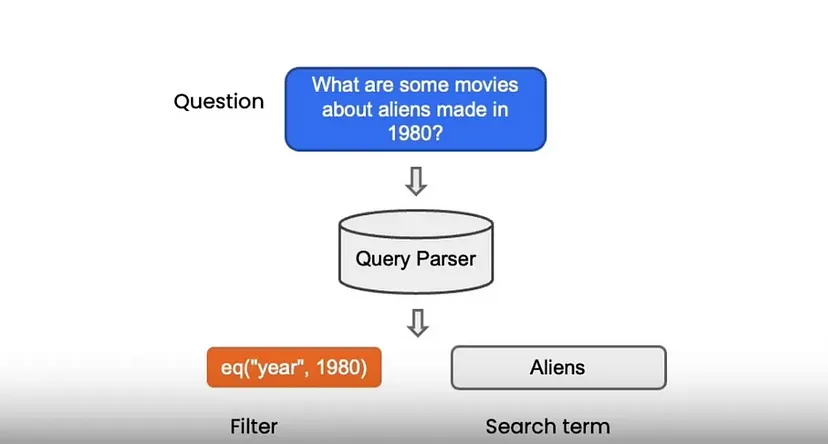

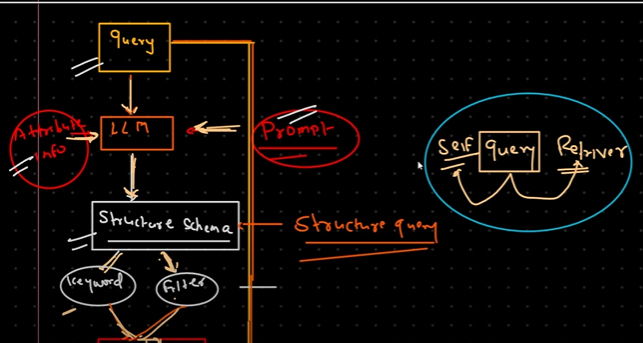

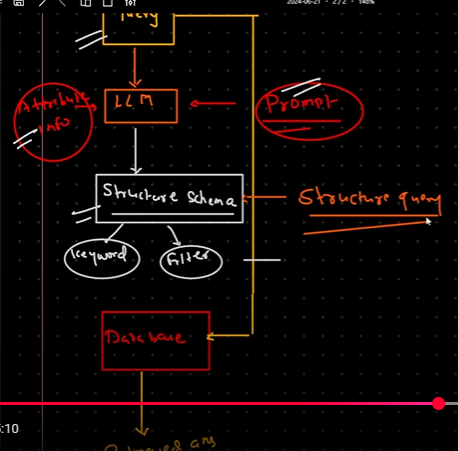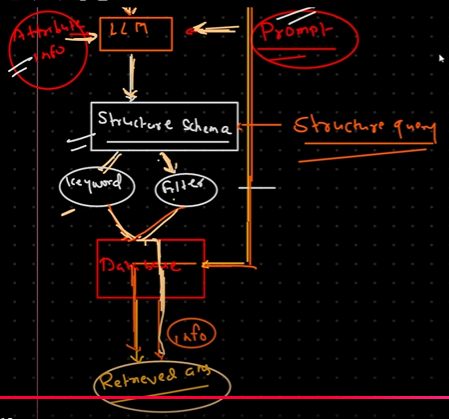
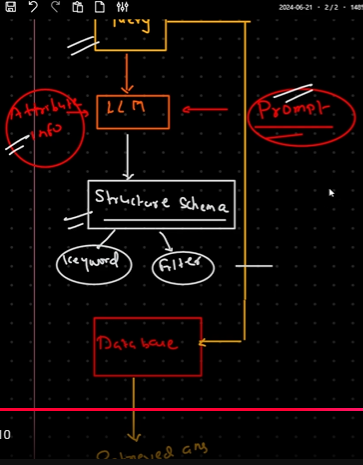

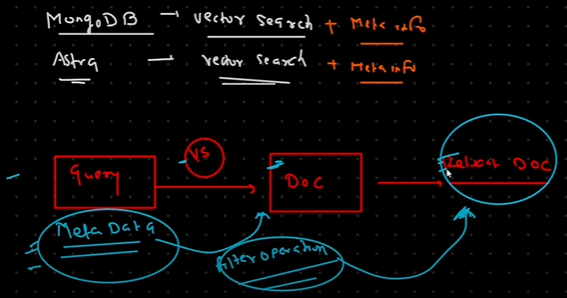

A self-query retriever is a retrieval system that can analyze a natural language question and use it to query itself. Here's how it works:

User Input: You provide a question in plain English. Understanding the Question: The retriever uses a large language model (LLM) to understand the intent and meaning behind your question.

Building a Structured Query: The LLM then translates your question into a structured query that a search engine can understand. This structured query might include keywords and filters based on the details you provided in your question.

Searching the Datastore: The retriever uses the structured query to search its underlying datastore, which is typically a vector store.

Returning Results: The retriever retrieves the documents from the datastore that are most relevant to your question.

We use metadata-filtering to filter out the important chunks.

When it can be used: It will be effective where you have to search in a small subset of the large document. Suppose you want to know about a particular department type like “Sales” in the whole document. Then you need to add this metadata info of department type in each chunk. And filter accordingly.

In [14]:
from langchain.chains.query_constructor.base import AttributeInfo
from langchain.retrievers.self_query.base import SelfQueryRetriever

In [15]:

metadata_field_info = [
    AttributeInfo(
        name="genre",
        description="The genre of the movie. One of ['science fiction', 'comedy', 'drama', 'thriller', 'romance', 'action', 'animated']",
        type="string",
    ),
    AttributeInfo(
        name="year",
        description="The year the movie was released",
        type="integer",
    ),
    AttributeInfo(
        name="director",
        description="The name of the movie director",
        type="string",
    ),
    AttributeInfo(
        name="rating", description="A 1-10 rating for the movie", type="float"
    ),
]

In [16]:

document_content_description = "Brief summary of a movie"

In [17]:
from langchain.chains.query_constructor.base import (
    StructuredQueryOutputParser,
    get_query_constructor_prompt,
)

In [18]:

prompt = get_query_constructor_prompt(
    document_content_description,
    metadata_field_info,
)

In [ ]:
# get_query_constructor_prompt function
# This line calls the get_query_constructor_prompt function, passing two arguments:
# document_content_description: A description of the document content.
# metadata_field_info: Information about the metadata fields.
# Purpose
# The get_query_constructor_prompt function generates a prompt for constructing a query based on the provided document content description and metadata field information.
# Output
# The function returns a prompt string that can be used to construct a query.

In [19]:
prompt

FewShotPromptTemplate(input_variables=['query'], input_types={}, partial_variables={}, examples=[{'i': 1, 'data_source': '```json\n{{\n    "content": "Lyrics of a song",\n    "attributes": {{\n        "artist": {{\n            "type": "string",\n            "description": "Name of the song artist"\n        }},\n        "length": {{\n            "type": "integer",\n            "description": "Length of the song in seconds"\n        }},\n        "genre": {{\n            "type": "string",\n            "description": "The song genre, one of "pop", "rock" or "rap""\n        }}\n    }}\n}}\n```', 'user_query': 'What are songs by Taylor Swift or Katy Perry about teenage romance under 3 minutes long in the dance pop genre', 'structured_request': '```json\n{{\n    "query": "teenager love",\n    "filter": "and(or(eq(\\"artist\\", \\"Taylor Swift\\"), eq(\\"artist\\", \\"Katy Perry\\")), lt(\\"length\\", 180), eq(\\"genre\\", \\"pop\\"))"\n}}\n```'}, {'i': 2, 'data_source': '```json\n{{\n    "con

In [20]:
import lark
output_parser = StructuredQueryOutputParser.from_components()

In [ ]:
# This line creates an instance of StructuredQueryOutputParser using the from_components() method.
# Purpose
# The StructuredQueryOutputParser is designed to parse the output of a query and extract relevant information in a structured format.
# from_components() method
# The from_components() method is used to create an instance of the parser from individual components, such as:
# Parser components: These are the building blocks of the parser, such as tokenizers, entity extractors, and relation extractors.
# Configuration: This defines how the components are assembled and configured to parse the output.

In [21]:
output_parser

StructuredQueryOutputParser(ast_parse=<bound method Lark.parse of Lark(open('<string>'), parser='lalr', lexer='contextual', ...)>)

In [22]:

query_constructor = prompt | llm | output_parser

In [25]:
query_constructor

FewShotPromptTemplate(input_variables=['query'], input_types={}, partial_variables={}, examples=[{'i': 1, 'data_source': '```json\n{{\n    "content": "Lyrics of a song",\n    "attributes": {{\n        "artist": {{\n            "type": "string",\n            "description": "Name of the song artist"\n        }},\n        "length": {{\n            "type": "integer",\n            "description": "Length of the song in seconds"\n        }},\n        "genre": {{\n            "type": "string",\n            "description": "The song genre, one of "pop", "rock" or "rap""\n        }}\n    }}\n}}\n```', 'user_query': 'What are songs by Taylor Swift or Katy Perry about teenage romance under 3 minutes long in the dance pop genre', 'structured_request': '```json\n{{\n    "query": "teenager love",\n    "filter": "and(or(eq(\\"artist\\", \\"Taylor Swift\\"), eq(\\"artist\\", \\"Katy Perry\\")), lt(\\"length\\", 180), eq(\\"genre\\", \\"pop\\"))"\n}}\n```'}, {'i': 2, 'data_source': '```json\n{{\n    "con

In [23]:
print(prompt.format(query="dummy question"))

Your goal is to structure the user's query to match the request schema provided below.

<< Structured Request Schema >>
When responding use a markdown code snippet with a JSON object formatted in the following schema:

```json
{
    "query": string \ text string to compare to document contents
    "filter": string \ logical condition statement for filtering documents
}
```

The query string should contain only text that is expected to match the contents of documents. Any conditions in the filter should not be mentioned in the query as well.

A logical condition statement is composed of one or more comparison and logical operation statements.

A comparison statement takes the form: `comp(attr, val)`:
- `comp` (eq | ne | gt | gte | lt | lte | contain | like | in | nin): comparator
- `attr` (string):  name of attribute to apply the comparison to
- `val` (string): is the comparison value

A logical operation statement takes the form `op(statement1, statement2, ...)`:
- `op` (and | or | not

In [24]:
query_constructor.invoke(
    {
        "query": "What are some sci-fi movies from the 90's directed by Luc Besson about taxi drivers"
    }
)

StructuredQuery(query='taxi driver', filter=Operation(operator=<Operator.AND: 'and'>, arguments=[Comparison(comparator=<Comparator.EQ: 'eq'>, attribute='genre', value='science fiction'), Comparison(comparator=<Comparator.GTE: 'gte'>, attribute='year', value=1990), Comparison(comparator=<Comparator.LT: 'lt'>, attribute='year', value=2000), Comparison(comparator=<Comparator.EQ: 'eq'>, attribute='director', value='Luc Besson')]), limit=None)

In [26]:

from langchain.retrievers.self_query.chroma import ChromaTranslator

retriever = SelfQueryRetriever(
    query_constructor=query_constructor,
    vectorstore=vectorstore,
    structured_query_translator=ChromaTranslator(),
)

In [ ]:
# SelfQueryRetriever
# This line creates an instance of SelfQueryRetriever, passing three arguments:
# query_constructor: An object responsible for constructing queries.
# vectorstore: A vector store that indexes and retrieves vectors.
# structured_query_translator: A translator that converts structured queries into a format compatible with the vector store.
# Purpose
# The SelfQueryRetriever is designed to retrieve relevant information from a vector store by:
# Constructing a query using the query_constructor.
# Translating the query into a vector store-compatible format using the structured_query_translator.
# Retrieving relevant vectors from the vectorstore.

In [27]:
retriever

SelfQueryRetriever(vectorstore=<langchain_chroma.vectorstores.Chroma object at 0x0000025A4601F990>, query_constructor=FewShotPromptTemplate(input_variables=['query'], input_types={}, partial_variables={}, examples=[{'i': 1, 'data_source': '```json\n{{\n    "content": "Lyrics of a song",\n    "attributes": {{\n        "artist": {{\n            "type": "string",\n            "description": "Name of the song artist"\n        }},\n        "length": {{\n            "type": "integer",\n            "description": "Length of the song in seconds"\n        }},\n        "genre": {{\n            "type": "string",\n            "description": "The song genre, one of "pop", "rock" or "rap""\n        }}\n    }}\n}}\n```', 'user_query': 'What are songs by Taylor Swift or Katy Perry about teenage romance under 3 minutes long in the dance pop genre', 'structured_request': '```json\n{{\n    "query": "teenager love",\n    "filter": "and(or(eq(\\"artist\\", \\"Taylor Swift\\"), eq(\\"artist\\", \\"Katy Perr

In [28]:
retriever.invoke(
    "What's a movie after 1990 but before 2005 that's all about toys, and preferably is animated"
)

[Document(id='e9e293a1-d113-430d-9cc4-249a16e4d135', metadata={'genre': 'animated', 'year': 1995}, page_content='Toys come alive and have a blast doing so'),
 Document(id='7ca3fe26-79b9-418d-ac97-2f01b001e9fb', metadata={'genre': 'animated', 'rating': 8.5, 'year': 1994}, page_content='A young lion prince flees his kingdom only to learn the true meaning of responsibility and bravery.')]

In [29]:
from operator import itemgetter
from langchain.prompts import ChatPromptTemplate
from langchain.schema.output_parser import StrOutputParser
from langchain.schema.runnable import RunnableLambda, RunnablePassthrough

In [30]:
template = """Answer the question based only on the following context:
{context}

Question: {question}
"""

In [34]:
prompt = ChatPromptTemplate.from_template(template)

In [35]:
chain = (
    {"context": retriever, "question": RunnablePassthrough()}
    | prompt
    | llm
    | StrOutputParser()
)

In [36]:
text_reply = chain.invoke("Tell me about the movie which have rating more than 7.")

print(wrap_text(text_reply))

The provided documents describe four movies:

* **A science fiction movie from 1993 about dinosaurs (rating 7.7).**
* **A science fiction movie from 1999 about a hacker in a simulated reality (rating 8.7),
directed by the Wachowskis.**
* **An animated movie from 1994 about a lion prince (rating 8.5).**
* **A movie from 2019 about wholesome women (rating 8.3), directed by Greta Gerwig.**
